
<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Three: Classifier training and performance assessment. </h2>	

In [319]:
#def train_test_split(df):
    #return df
#Split the data into a training set, and test set 
#def accuracy(pred, actual):
    #return 0
# Calculate the accuracy percentage of the predicted values

In [320]:
# importing libraries
import numpy as np
import pandas as pd

In [321]:
# Loading the data from pickle file and setting X_train and Y_train
all_features = pd.read_pickle("./all_features.pkl")
starting_train_model = all_features.iloc[:, 2:]
y_stat_train = all_features['encodings']
y_stat_train = y_stat_train.reset_index(drop=True)
y_stat_train = y_stat_train.astype('category')

In [322]:
# Normalizing the data between (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0, 1))
X_train_to_model = pd.DataFrame(scaler.fit_transform(starting_train_model))

<h3> Function to perform KFold Cross - Validation </h3>

In [323]:
# Function to perform KFold Cross - Validation

from sklearn.model_selection import KFold
import sklearn.model_selection

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=5, shuffle=True)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx, :], X_train.iloc[valid_idx, :]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train,split_Y_train)
        
        # Compute the RMSE on the validation split
        error = np.sum(split_Y_valid == model.predict(split_X_valid))/split_X_valid.shape[0]


        validation_errors.append(error)
        
    return np.mean(validation_errors)

<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


<h4> Test-train split </h4>

In [324]:
copy_features = all_features.iloc[:, 2:]
scaler= MinMaxScaler(feature_range=(0, 1))
copy_features = pd.DataFrame(scaler.fit_transform(copy_features))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copy_features, all_features['encodings'], test_size=0.25, random_state=42)
y_train= y_train.astype('category')                                                                                                                                                            

<h4> Using training data to perform cross validation and hyperparamater tuning </h4>

<h4> K-Fold Validation on the training set </h4>

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
# Hyper parameters obtained from RandomisedSearchCV
best_svr1 = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf= 2, max_features = 'sqrt', max_depth=90, bootstrap=False)
# Random Forest with 400 estimators, using only one hyperparameter
best_svr = RandomForestClassifier(n_estimators=300, random_state=0)
# Logistic Regression
logisreg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', C = 12)
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=15)
# Decision Tree Classifier
decision_tree= tree.DecisionTreeClassifier(max_depth = 13)
# Support Vector Machines
svm1 = LinearSVC(C=0.6)

In [326]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
print("Accuracy of Random forest with multiple tuned hyper parameters: " + str(compute_CV_error(best_svr1, X_train, y_train)))
print("Accuracy of Random forest with single tuned hyper parameters: " + str(compute_CV_error(best_svr,X_train, y_train)))
print("Accuracy of Logistic Regression: " + str(compute_CV_error(logisreg,X_train, y_train)))
print("Accuracy of K-Nearest Neighbours: " + str(compute_CV_error(knn,X_train, y_train)))
print("Accuracy of Decision trees: " + str(compute_CV_error(decision_tree, X_train, y_train)))
print("Accuracy of Support Vector Machines: " + str(compute_CV_error(svm1, X_train, y_train)))

Accuracy of Random forest with multiple tuned hyper parameters: 0.41688888888888886
Accuracy of Random forest with single tuned hyper parameters: 0.4231111111111111


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/li

Accuracy of Logistic Regression: 0.4275555555555555
Accuracy of K-Nearest Neighbours: 0.31999999999999995
Accuracy of Decision trees: 0.3244444444444444
Accuracy of Support Vector Machines: 0.42400000000000004


## Hyperparameter Tuning for Models

### Tuned Hyperparameter: n_estimators  (Random Forests)

Lets simulate the accuracy for differ values and show a graph of the n_estimators vs Accuracy

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [328]:
n_estimators=  [100, 200, 300, 400, 500, 600, 700, 800]

In [329]:
accuracy_est = []
for i in n_estimators:
    best_svr2 = RandomForestClassifier(n_estimators=i, random_state=0)
    accuracy = compute_CV_error(best_svr2, X_train_to_model, y_stat_train)
    #print("Accuracy of Random forest with single tuned hyper parameters: " + str(accuracy))
    accuracy_est.append(accuracy)    

Text(0, 0.5, 'Model Accuracy')

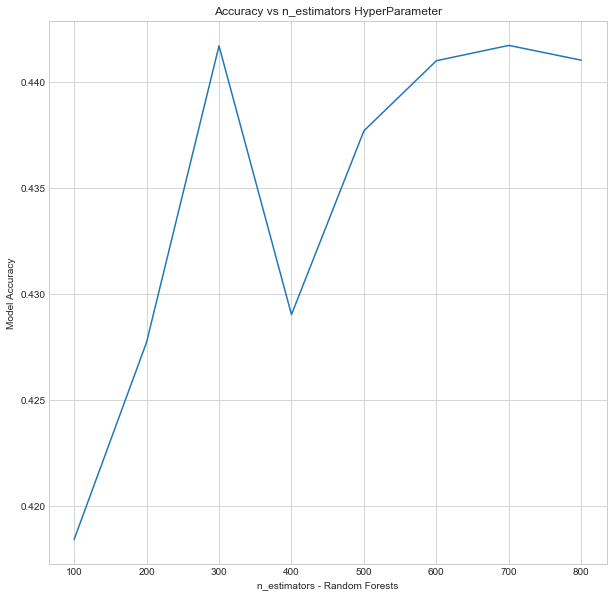

In [330]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x= n_estimators, y=accuracy_est,)
plt.title('Accuracy vs n_estimators HyperParameter')
plt.xlabel('n_estimators - Random Forests')
plt.ylabel('Model Accuracy')

<h3> Hyper parameter tuning for Logistic Regression </h4>

In [331]:
C_list = range(1,21)

In [332]:
log_acc = []
for i in C_list:
    logisreg2 = LogisticRegression(multi_class='multinomial', solver = 'lbfgs',C=i)
    accuracy = compute_CV_error(logisreg2, X_train_to_model, y_stat_train)
    #print("When C = "+ str(i)+ " ,the accuracy is: "+ str(accuracy))
    log_acc.append(accuracy)  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/li

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/li

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/li

Text(0, 0.5, 'Model Accuracy')

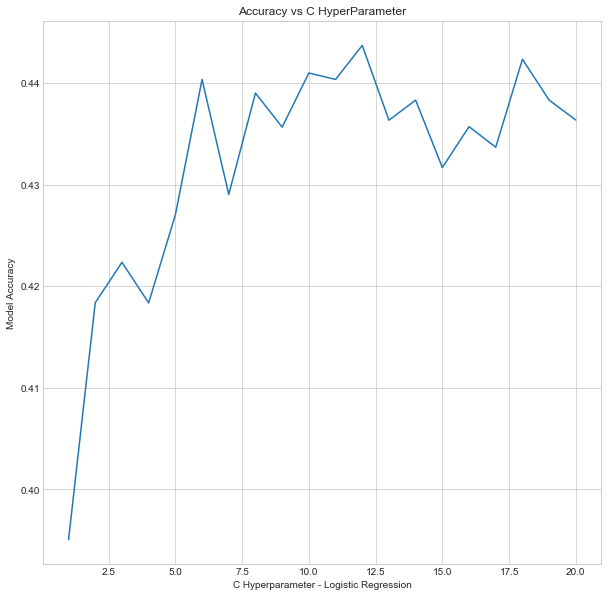

In [333]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x= C_list, y=log_acc,)
plt.title('Accuracy vs C HyperParameter')
plt.xlabel('C Hyperparameter - Logistic Regression')
plt.ylabel('Model Accuracy')

<h3> Hyper parameter tuning for Decision trees </h4>

In [334]:
max_depth = range(1,20)
tree_acc = []
for i in max_depth:
    decision_tree2= tree.DecisionTreeClassifier(max_depth=i)
    accuracy = compute_CV_error(decision_tree2, X_train_to_model, y_stat_train)
    #print("When max_depth = "+ str(i)+ " ,the accuracy is: "+ str(accuracy))
    tree_acc.append(accuracy)  

Text(0, 0.5, 'Model Accuracy')

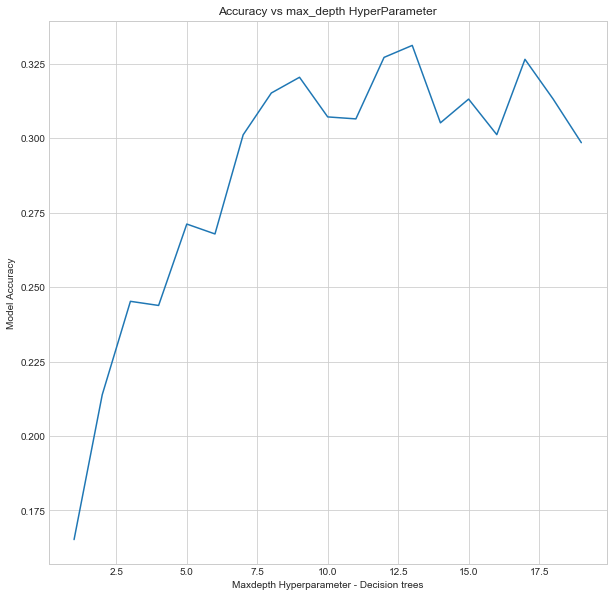

In [335]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x=max_depth , y=tree_acc,)
plt.title('Accuracy vs max_depth HyperParameter')
plt.xlabel('Maxdepth Hyperparameter - Decision trees')
plt.ylabel('Model Accuracy')

<h3> Hyper parameter tuning for SVM </h4>

In [336]:
C_l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10]
svm_acc = []
for i in C_l:
    svm_tune= LinearSVC(C=i,)
    accuracy = compute_CV_error(svm_tune, X_train_to_model, y_stat_train)
    #print("When C = "+ str(i)+ " ,the accuracy is: "+ str(accuracy))
    svm_acc.append(accuracy)  

Text(0, 0.5, 'Model Accuracy')

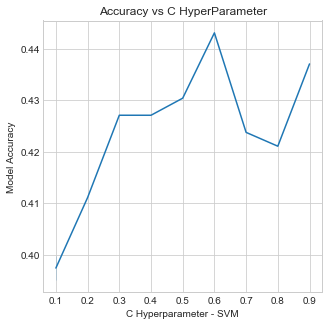

In [337]:
plt.figure(figsize=(5, 5))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x=C_l , y=svm_acc,)
plt.title('Accuracy vs C HyperParameter')
plt.xlabel('C Hyperparameter - SVM')
plt.ylabel('Model Accuracy')

<h3> Test Accuracy from differnt algorithms </h3>

The model was evaluated with 5-fold cross validation and the best hyperparameters were obtained and now we'll check 
the accuracy of the test dataset.

Logistic Regression

In [347]:
test_accuracy = []
# logistic regression model
from sklearn.linear_model import LogisticRegression
def logisticRegression(X_train_to_model, y_train, X_test, y_test):
    logisticRegr = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', C = 12)
    logisticRegr.fit(X_train_to_model, y_train)
    # Prediction and print Accuracy for Logistic regression
    y_pred = logisticRegr.predict(X_test)
    accuracy = np.sum(y_test == y_pred)/len(y_pred)
    test_accuracy.append(accuracy)
    return accuracy

acc1 = logisticRegression(X_train, y_train, X_test, y_test)
print('Logistic Regression:')
print(acc1)

Logistic Regression:
0.43882978723404253


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


K-nearest Neighbors

In [348]:
# Implementing KNearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train_to_model, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=8)
    model.fit(X_train_to_model, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.sum(y_test == y_pred)/len(y_test)
    test_accuracy.append(accuracy)
    return accuracy
acc2 = knn(X_train, y_train, X_test, y_test)
print('KNN')
print(acc2)

KNN
0.3404255319148936


Classification Tree

In [349]:
# Implementing Decision Trees Algorithm
from sklearn import tree
def decisionTrees(X_train_to_model, y_train, X_test, y_test):
    clf = tree.DecisionTreeClassifier(max_depth = 13)
    clf.fit(X_train_to_model, y_train)
    y_pred = clf.predict(X_test)
    accuracy = np.sum(y_test == y_pred)/len(y_test)
    test_accuracy.append(accuracy)
    return accuracy
acc3 = decisionTrees(X_train, y_train, X_test, y_test)
print('Decision Trees: ')
print(acc3)

Decision Trees: 
0.30319148936170215


Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier
def randomForest(X_train_to_model, y_train, X_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=300, random_state=0)
    rf_model.fit(X_train_to_model, y_train)
    rf_model_y_pred = rf_model.predict(X_test)
    accuracy = np.sum(y_test == rf_model_y_pred)/len(rf_model_y_pred)
    test_accuracy.append(accuracy)
    return accuracy
acc4 = randomForest(X_train, y_train, X_test, y_test)
print('Random Forests: ')
print(acc4)

Random Forests: 
0.425531914893617


Support Vector Machine

In [351]:
from sklearn.svm import LinearSVC
def svm_m(X_train_to_model, y_train, X_test, y_test):
    lin_clf = LinearSVC(C=1)
    lin_clf.fit(X_train_to_model, y_train)
    y_pred = lin_clf.predict(X_test)
    accuracy = np.sum(y_test == y_pred)/len(y_test)
    test_accuracy.append(accuracy)
    return accuracy
acc4 =svm_m(X_train, y_train, X_test, y_test)
print('SVM: ')
print(acc4)

SVM: 
0.4601063829787234


<h4> Plotting Model vs Accuracy </h4>

In [343]:
list1 = [1,2,3,4,5]

plt.figure(figsize=(7, 7))
plt.scatter(list1, test_accuracy)
plt.title('Model vs Accuracy')

models = ['Logistic Regression','KNN','Decision Tree','Random Forest','Support Vector Machines']

i=0
for txt in models:
    plt.annotate(txt, (list1[i], test_accuracy[i]))
    i +=1

<h4> Validataion Data Prediction for Submission </h4>

In [353]:
# Reading Validation Feature pickle file
validation_features = pd.read_pickle("./validation_features.pkl")

In [354]:
# Checking the Validation_ feature dataframe shape
validation_features.shape

(716, 558)

In [355]:
# Fitting support Vector Machine Model on the entire 1501 training dataset
svm1.fit(X_train_to_model, y_stat_train)

LinearSVC(C=0.6, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [356]:
# Predictions from SVM
a = svm1.predict(validation_features.iloc[:,1:])

In [357]:
# The classes that SVM predicts
np.unique(a)

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 11, 14, 15, 16, 17, 18, 19])

In [358]:
# Finding unique elements and their counts of SVM Predictions
unique_elements, counts_elements = np.unique(a, return_counts=True)

In [359]:
# Counts of predicted categories
counts_elements

array([  1, 108,   9, 178,  11,  18,  11,   7,  20,  13, 140,  74,  23,
        68,   7,  28])

In [360]:
# Creating submissions.csv
import pandas as pd
data3 = pd.DataFrame(a)
pd.DataFrame(a).to_csv(r"submissions.csv", header=False, index = False, line_terminator="")